<a href="https://colab.research.google.com/github/MuhammadAshiqAmeer/Federated_learning_experiments_with_Intel-openfl/blob/colab/neuroblastoma.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [2]:
cd /content/drive/MyDrive/federated

/content/drive/MyDrive/federated


In [3]:
!ls

'Federated lemon-melon CNN classifier'	 neuroblastoma.xlsx


In [4]:
import pandas as pd

df = pd.read_excel("neuroblastoma.xlsx")
df = df.sample(frac=1).reset_index(drop=True)


In [5]:
df

,TARGET USI,Gender,Age at Diagnosis in Days,Event Free Survival Time in Days,Vital Status,Overall Survival Time in Days,INSS Stage,MYCN status,Ploidy Value,Histology,MKI,COG Risk Group
0,TARGET-30-PAVDBS,Female,1212,475,Dead,863,Stage 4,Amplified,1.24,Unfavorable,High,High Risk
1,TARGET-30-PAUGGK,Female,884,2317,Alive,2317,Stage 4,Amplified,1.00,Unfavorable,High,High Risk
2,TARGET-30-PALRFJ,Female,709,2536,Alive,2536,Stage 4,Not Amplified,1.48,Unfavorable,High,High Risk
3,TARGET-30-PAMNAL,Female,1235,4499,Alive,4499,Stage 4,Not Amplified,1.55,Unfavorable,Intermediate,High Risk
4,TARGET-30-PANYUG,Male,614,1417,Alive,1417,Stage 4,Not Amplified,1.49,Unfavorable,Intermediate,High Risk
...,...,...,...,...,...,...,...,...,...,...,...,...
733,TARGET-30-PAUXFZ,Male,159,2215,Alive,2215,Stage 2b,Not Amplified,1.33,Favorable,Low,Low Risk
734,TARGET-30-PATCEM,Male,1257,2291,Alive,2291,Stage 4,Amplified,1.47,Unfavorable,Intermediate,High Risk
735,TARGET-30-PAUGRP,Male,199,2386,Alive,2386,Stage 4,Amplified,1.00,Favorable,Intermediate,High Risk
736,TARGET-30-PATZRF,Male,189,481,Dead,885,Stage 4s,Amplified,1.76,Unfavorable,High,High Risk


In [6]:
df.describe()

,Age at Diagnosis in Days,Event Free Survival Time in Days,Overall Survival Time in Days,Ploidy Value
count,738.000000,738.000000,738.000000,738.000000
mean,942.105691,1907.228997,2261.162602,1.322967
std,928.520081,1466.809684,1341.896447,0.353940
min,1.000000,10.000000,10.000000,0.960000
25%,315.250000,491.500000,960.750000,1.000000
50%,740.500000,1762.500000,2428.500000,1.220000
75%,1264.500000,3198.000000,3351.750000,1.530000
max,7613.000000,6170.000000,6170.000000,3.000000


In [7]:
df["Gender"]=df["Gender"].replace({"Male":1,"Female":0})
df['Gender']

0      0
1      0
2      0
3      0
4      1
      ..
733    1
734    1
735    1
736    1
737    1
Name: Gender, Length: 738, dtype: int64

In [8]:
df["Vital Status"]=df["Vital Status"].replace({"Dead":0,"Alive":1})
df["Vital Status"]

0      0
1      1
2      1
3      1
4      1
      ..
733    1
734    1
735    1
736    0
737    0
Name: Vital Status, Length: 738, dtype: int64

In [9]:
df["INSS Stage"].unique()

array(['Stage 4', 'Stage 2b', 'Stage 3', 'Stage 1', 'Stage 4s',
       'Stage 2a'], dtype=object)

In [10]:
df["INSS Stage"]=df["INSS Stage"].replace({"Stage 1":0,"Stage 2a":1,"Stage 2b":2,"Stage 3":3,"Stage 4":4,"Stage 4s":5,})
df["INSS Stage"]

0      4
1      4
2      4
3      4
4      4
      ..
733    2
734    4
735    4
736    5
737    4
Name: INSS Stage, Length: 738, dtype: int64

In [11]:
df["MYCN status"].unique()

array(['Amplified', 'Not Amplified'], dtype=object)

In [12]:
df["MYCN status"]=df["MYCN status"].replace({"Not Amplified":0,"Amplified":1})
df["MYCN status"]

0      1
1      1
2      0
3      0
4      0
      ..
733    0
734    1
735    1
736    1
737    1
Name: MYCN status, Length: 738, dtype: int64

In [13]:
df["Histology"].unique()

array(['Unfavorable', 'Favorable'], dtype=object)

In [14]:
df["MKI"].unique()

array(['High', 'Intermediate', 'Low'], dtype=object)

In [15]:
df["COG Risk Group"].unique()

array(['High Risk', 'Low Risk', 'Intermediate Risk'], dtype=object)

In [16]:
df["Histology"]=df["Histology"].replace({"Favorable":0,"Unfavorable":1})
df["MKI"]=df["MKI"].replace({"Low":0,"High":1,"Intermediate":2})
df["COG Risk Group"]=df["COG Risk Group"].replace({"Low Risk":0,"Intermediate Risk":1,"High Risk":2})

In [17]:
print(df["Histology"])
print(df["MKI"])
print(df["COG Risk Group"])

0      1
1      1
2      1
3      1
4      1
      ..
733    0
734    1
735    0
736    1
737    1
Name: Histology, Length: 738, dtype: int64
0      1
1      1
2      1
3      2
4      2
      ..
733    0
734    2
735    2
736    1
737    1
Name: MKI, Length: 738, dtype: int64
0      2
1      2
2      2
3      2
4      2
      ..
733    0
734    2
735    2
736    2
737    2
Name: COG Risk Group, Length: 738, dtype: int64


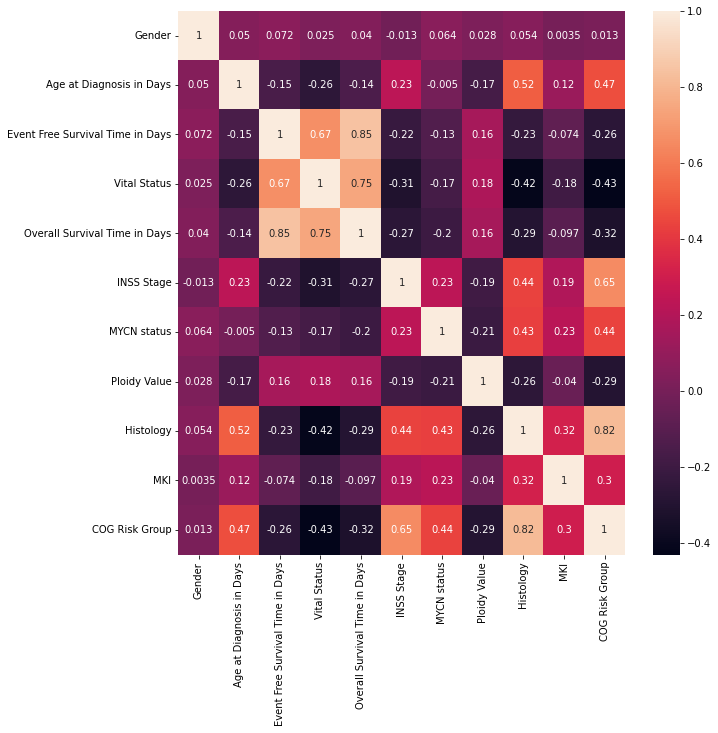

In [18]:
import seaborn as sns
import matplotlib.pyplot as plt

corr = df.corr()

fig, ax = plt.subplots(figsize=(10,10))
sns.heatmap(corr, 
         xticklabels=corr.columns, 
         yticklabels=corr.columns,
         annot=True)

In [19]:
df["Overall Survival Time in Years"] = round(df["Overall Survival Time in Days"]/365,0)
df["Overall Survival Time in Years"]
df["Overall Survival Time in Years"].unique()

array([ 2.,  6.,  7., 12.,  4.,  9., 11.,  1.,  5.,  0.,  3.,  8., 10.,
       13., 14., 15., 17.])

In [20]:
df

,TARGET USI,Gender,Age at Diagnosis in Days,Event Free Survival Time in Days,Vital Status,Overall Survival Time in Days,INSS Stage,MYCN status,Ploidy Value,Histology,MKI,COG Risk Group,Overall Survival Time in Years
0,TARGET-30-PAVDBS,0,1212,475,0,863,4,1,1.24,1,1,2,2.0
1,TARGET-30-PAUGGK,0,884,2317,1,2317,4,1,1.00,1,1,2,6.0
2,TARGET-30-PALRFJ,0,709,2536,1,2536,4,0,1.48,1,1,2,7.0
3,TARGET-30-PAMNAL,0,1235,4499,1,4499,4,0,1.55,1,2,2,12.0
4,TARGET-30-PANYUG,1,614,1417,1,1417,4,0,1.49,1,2,2,4.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
733,TARGET-30-PAUXFZ,1,159,2215,1,2215,2,0,1.33,0,0,0,6.0
734,TARGET-30-PATCEM,1,1257,2291,1,2291,4,1,1.47,1,2,2,6.0
735,TARGET-30-PAUGRP,1,199,2386,1,2386,4,1,1.00,0,2,2,7.0
736,TARGET-30-PATZRF,1,189,481,0,885,5,1,1.76,1,1,2,2.0


In [21]:
x=df.drop(['Vital Status','TARGET USI','Overall Survival Time in Days','Gender'],axis=1)
x

,Age at Diagnosis in Days,Event Free Survival Time in Days,INSS Stage,MYCN status,Ploidy Value,Histology,MKI,COG Risk Group,Overall Survival Time in Years
0,1212,475,4,1,1.24,1,1,2,2.0
1,884,2317,4,1,1.00,1,1,2,6.0
2,709,2536,4,0,1.48,1,1,2,7.0
3,1235,4499,4,0,1.55,1,2,2,12.0
4,614,1417,4,0,1.49,1,2,2,4.0
...,...,...,...,...,...,...,...,...,...
733,159,2215,2,0,1.33,0,0,0,6.0
734,1257,2291,4,1,1.47,1,2,2,6.0
735,199,2386,4,1,1.00,0,2,2,7.0
736,189,481,5,1,1.76,1,1,2,2.0


In [22]:
#x_train=x.iloc[0:590]
#x_test=x.iloc[590:738]

In [23]:
#x_train

In [24]:
#x_test

In [25]:
y=df['Vital Status']
y

0      0
1      1
2      1
3      1
4      1
      ..
733    1
734    1
735    1
736    0
737    0
Name: Vital Status, Length: 738, dtype: int64

In [26]:
#y_train=y.iloc[0:590]
#y_test=y.iloc[590:738]

In [27]:
#y_train

In [28]:
#y_test

In [29]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

train_scaled = scaler.fit_transform(x)
#test_scaled = scaler.transform(x_test)

In [30]:
train_scaled

array([[ 0.29086862, -0.97708677,  0.45284274, ...,  0.11130623,
         0.65087137, -1.13699634],
       [-0.06262126,  0.27955154,  0.45284274, ...,  0.11130623,
         0.65087137, -0.05007497],
       [-0.25122104,  0.42895642,  0.45284274, ...,  0.11130623,
         0.65087137,  0.22165537],
       ...,
       [-0.80085469,  0.32662431,  0.45284274, ...,  1.31930621,
         0.65087137,  0.22165537],
       [-0.81163182, -0.97299348,  1.18412927, ...,  0.11130623,
         0.65087137, -1.13699634],
       [-0.33528266, -1.12785607,  0.45284274, ...,  0.11130623,
         0.65087137, -1.40872668]])

# Vital status

In [31]:
import tensorflow as tf
from tensorflow.python.keras.models import Sequential
from tensorflow.python.keras.layers import Dense, Activation
import numpy as np
import random

random.seed(42)
np.random.seed(42)
tf.random.set_seed(42)

model = Sequential()
model.add(Dense(32, input_shape=(9,)))
model.add(Activation('relu'))
model.add(Dense(16))
model.add(Activation('relu'))
model.add(Dense(1))
model.add(Activation('sigmoid'))

model.compile(loss='binary_crossentropy', optimizer='sgd', metrics=['accuracy']) 
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 32)                320       
_________________________________________________________________
activation (Activation)      (None, 32)                0         
_________________________________________________________________
dense_1 (Dense)              (None, 16)                528       
_________________________________________________________________
activation_1 (Activation)    (None, 16)                0         
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 17        
_________________________________________________________________
activation_2 (Activation)    (None, 1)                 0         
Total params: 865
Trainable params: 865
Non-trainable params: 0
__________________________________________________________

In [32]:
trained_model=model.fit(train_scaled, y,validation_split=0.3,epochs=50,batch_size=20)

Epoch 1/50
26/26 [==============================] - 2s 24ms/step - loss: 0.7205 - accuracy: 0.4709 - val_loss: 0.6347 - val_accuracy: 0.7027
Epoch 2/50
26/26 [==============================] - 0s 6ms/step - loss: 0.6078 - accuracy: 0.7267 - val_loss: 0.5652 - val_accuracy: 0.8694
Epoch 3/50
26/26 [==============================] - 0s 8ms/step - loss: 0.5401 - accuracy: 0.8217 - val_loss: 0.5172 - val_accuracy: 0.8784
Epoch 4/50
26/26 [==============================] - 0s 8ms/step - loss: 0.4920 - accuracy: 0.8430 - val_loss: 0.4793 - val_accuracy: 0.8784
Epoch 5/50
26/26 [==============================] - 0s 6ms/step - loss: 0.4542 - accuracy: 0.8643 - val_loss: 0.4477 - val_accuracy: 0.8784
Epoch 6/50
26/26 [==============================] - 0s 5ms/step - loss: 0.4231 - accuracy: 0.8721 - val_loss: 0.4198 - val_accuracy: 0.8874
Epoch 7/50
26/26 [==============================] - 0s 5ms/step - loss: 0.3966 - accuracy: 0.8818 - val_loss: 0.3949 - val_accuracy: 0.8964
Epoch 8/50
26/26 [=

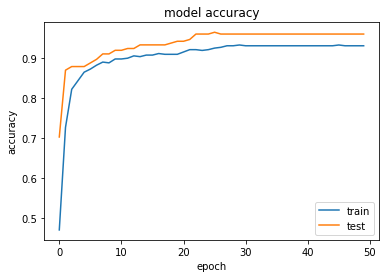

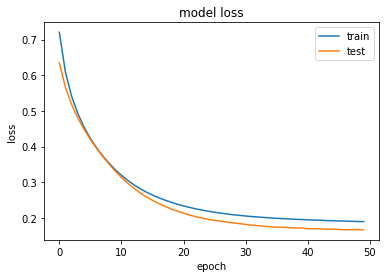

In [33]:
import matplotlib.pyplot as plt
# summarize history for accuracy
plt.plot(trained_model.history['accuracy'])
plt.plot(trained_model.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='lower right')
plt.show()
# summarize history for loss
plt.plot(trained_model.history['loss'])
plt.plot(trained_model.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper right')
plt.show()

# Split data into 3


In [34]:
x_split1 = x.iloc[0:246]
x_split2 = x.iloc[246:492]
x_split3 = x.iloc[492:738]

In [35]:
y_split1 = y.iloc[0:246]
y_split2 = y.iloc[246:492]
y_split3 = y.iloc[492:738]

In [36]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
train_scaled_s1 = scaler.fit_transform(x_split1)
train_scaled_s2 = scaler.fit_transform(x_split2)
train_scaled_s3 = scaler.fit_transform(x_split3)

In [46]:
import tensorflow as tf
from tensorflow.python.keras.models import Sequential
from tensorflow.python.keras.layers import Dense, Activation
import numpy as np
import random

random.seed(42)
np.random.seed(42)
tf.random.set_seed(42)

model_s = Sequential()
model_s.add(Dense(32, input_shape=(9,)))
model_s.add(Activation('relu'))
model_s.add(Dense(16))
model_s.add(Activation('relu'))
model_s.add(Dense(1))
model_s.add(Activation('sigmoid'))

model_s.compile(loss='binary_crossentropy', optimizer='sgd', metrics=['accuracy']) 
model_s.summary()

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_12 (Dense)             (None, 32)                320       
_________________________________________________________________
activation_12 (Activation)   (None, 32)                0         
_________________________________________________________________
dense_13 (Dense)             (None, 16)                528       
_________________________________________________________________
activation_13 (Activation)   (None, 16)                0         
_________________________________________________________________
dense_14 (Dense)             (None, 1)                 17        
_________________________________________________________________
activation_14 (Activation)   (None, 1)                 0         
Total params: 865
Trainable params: 865
Non-trainable params: 0
________________________________________________________

In [47]:
trained_model_s=model_s.fit(train_scaled_s1, y_split1,validation_split=0.3,epochs=50,batch_size=10)

Epoch 1/50
18/18 [==============================] - 1s 19ms/step - loss: 0.7369 - accuracy: 0.4709 - val_loss: 0.6979 - val_accuracy: 0.5676
Epoch 2/50
18/18 [==============================] - 0s 5ms/step - loss: 0.6492 - accuracy: 0.6512 - val_loss: 0.6217 - val_accuracy: 0.6757
Epoch 3/50
18/18 [==============================] - 0s 5ms/step - loss: 0.5865 - accuracy: 0.7965 - val_loss: 0.5703 - val_accuracy: 0.7838
Epoch 4/50
18/18 [==============================] - 0s 5ms/step - loss: 0.5419 - accuracy: 0.8488 - val_loss: 0.5315 - val_accuracy: 0.7973
Epoch 5/50
18/18 [==============================] - 0s 6ms/step - loss: 0.5065 - accuracy: 0.8721 - val_loss: 0.5009 - val_accuracy: 0.8108
Epoch 6/50
18/18 [==============================] - 0s 5ms/step - loss: 0.4779 - accuracy: 0.8779 - val_loss: 0.4721 - val_accuracy: 0.8108
Epoch 7/50
18/18 [==============================] - 0s 5ms/step - loss: 0.4508 - accuracy: 0.8721 - val_loss: 0.4473 - val_accuracy: 0.8108
Epoch 8/50
18/18 [=

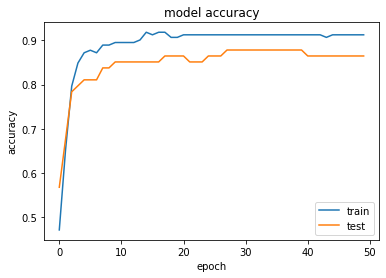

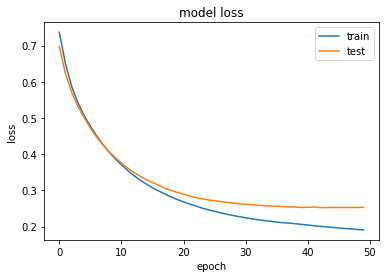

In [48]:
import matplotlib.pyplot as plt
# summarize history for accuracy
plt.plot(trained_model_s.history['accuracy'])
plt.plot(trained_model_s.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='lower right')
plt.show()
# summarize history for loss
plt.plot(trained_model_s.history['loss'])
plt.plot(trained_model_s.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper right')
plt.show()